In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

Data Loading

In [ ]:
import torchvision
import torchvision.transforms as transforms
trainset= torchvision.datasets.CIFAR10(root= './data', train= True,download= True, transform= transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes= ('plane', 'car','bird','cat', 'deer','dog','frog','horse','ship','truck')

In [ ]:
trainloader= torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True)

In [ ]:
dataiter= iter(trainloader)
images, labels= dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
1


Visualizing data

In [ ]:
img= images[0]
print(type(img))

<class 'torch.Tensor'>


In [ ]:
npimg= img.numpy()
print(npimg.shape)

(3, 32, 32)


In [ ]:
npimg= np.transpose(npimg,(1,2,0))
print(npimg.shape)

(32, 32, 3)


<function matplotlib.pyplot.show>

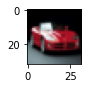

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(npimg)
plt.show

In [ ]:
def imshow(img):
  npimg= img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

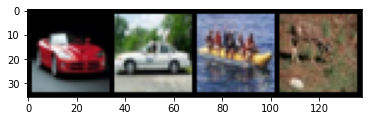

car car ship deer


In [ ]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

Single Convolution Layer

In [ ]:
import torch.nn as nn

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1= nn.Conv2d(3,16,3,padding=(1,1), stride=(2,2))
  def forward(self, x):
    x= self.conv1(x)
    return x

In [ ]:
net= FirstCNN()

In [ ]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [ ]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [ ]:
out1= out[0,0,:,:].detach().numpy()
print(out1.shape)

(16, 16)


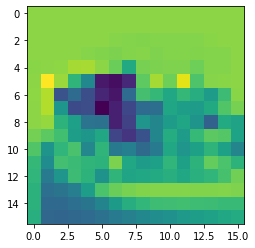

In [ ]:
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

Deep Convolution Network

In [ ]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model= nn.Sequential(
        nn.conv2d(3,8,3),
        nn.conv2d(8,16,3)
    )
  def forward(self, x):
    x= self.model(x)
    return x

In [ ]:
net= FirstCNN_v2()
out= net(images)
out.shape

AttributeError: ignored

In [ ]:
plt.imshow(out[0,0,:,:].detach().numpy())

In [ ]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3, self).__init__()
    self.model= nn.Sequential(
        nn.conv2d(3,6,5)
        nn.AvgPool2d(2, stride=2)
        nn.conv2d(6,16,5)
        nn.AvgPool2d(2, stride=2)
    )
  def forward(self, x):
    x= self.model(x)
    return x;


In [ ]:
net= FirstCNN_v3()
out= net(images)
out.shape

In [ ]:
plt.imshow(out[0,0,:,:].detach().numpy())

LeNet

In [ ]:
class LeNet(nn.Module):
  def __init__():
    super(LeNet, self).__init__()
    self.cnn_model= nn.sequential(
        nn.conv2d(3,6,5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.conv2d(6,16,5),
        nn.Tanh(),
        nn.AvgPool2d(2, stide=2)
    )
    self.fc_model= nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.linear(84,10)
    )
  def forward(self,x):
    print(x.shape)
    x= self.cnn_model(x)
    print(x.shape)
    x= x.veiw(x.size(0),-1)
    print(x.shape)
    x= self.fc_model(x)
    print(x.shape)
    return x

In [ ]:
net= LeNet()
out= net(images)

In [ ]:
print(out)

In [ ]:
max_values, pred_class= torch.max(out.data, 1)
print(pred_class)

Training LeNet

In [ ]:
class LeNet(nn.Module):
  def __init__():
    super(LeNet, self).__init__()
    self.cnn_model= nn.sequential(
        nn.conv2d(3,6,5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.conv2d(6,16,5),
        nn.Tanh(),
        nn.AvgPool2d(2, stide=2)
    )
    self.fc_model= nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.linear(84,10)
    )
  def forward(self,x):
    x= self.cnn_model(x)
    x= x.veiw(x.size(0),-1)
    x= self.fc_model(x)
    return x

In [ ]:
batch_size= 128
trainset= torchvision.datasets.CIFAR10(root= './data', train= True,download= True, transform= transforms.ToTensor())
trainloader= torch.utils.data.DataLoader(trainset, batch_size= batch_size,shuffle=True)
testset= torchvision.datasets.CIFAR10(root= './data', train= False,download= True, transform= transforms.ToTensor())
testloader= torch.utils.data.DataLoader(trainset, batch_size= batch_size,shuffle=False)

In [ ]:
def evaluation(dataloader):
  total,correct=0,0
  for data in dataloader:
    inputs, labels= data
    outputs= net(inputs)
    _,pred= torch.max(outputs.data,1)
    total+= labels.size(0)
    sum+= (pred == labels).sum().item()
  return 100* correct/total


In [ ]:
net= LeNet()

In [ ]:
import torch.optim as optim

loss_fn= nn.CrossEntropyLoss()
opt= optim.Adam(net.parameters())

In [ ]:
%%time
loss_arr=[]
loss_epoch_arr=[]

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader,0):
    input, labels= data
    opt.zero_grad()

    outputs= net(inputs)
    loss= loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())
  print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' %(epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
plt.plot(loss_epoch_arr)
plt.show()